In [125]:
%matplotlib inline 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Physical constants
m_e = 1e-27
m_p = 1836 * m_e
c = 3e10
k_B = 1.4e-16
h = 2 * np.pi * 1e-27
h_bar = 1e-27
steph_boltz = 6e-5
a_0 = 5e-9
e = 5e-10
eV = 1.6e-12

def planck(nu, T):
    return 2 * h * nu ** 3 / (c ** 2 * (np.exp(h * nu / (k_B * T)) - 1))

In [34]:
T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak
extent = 1e12

# Range of frequencies to plot
nu = np.linspace(0.1, nu_peak + 4e12, 1000)

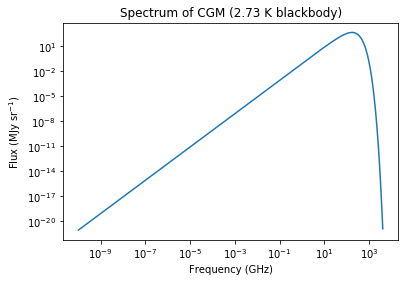

In [36]:
plt.plot(nu / 1e9, planck(nu, T) / 1e-23 / 1e6)
plt.title(r'Spectrum of CGM (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.yscale('log')
plt.show()

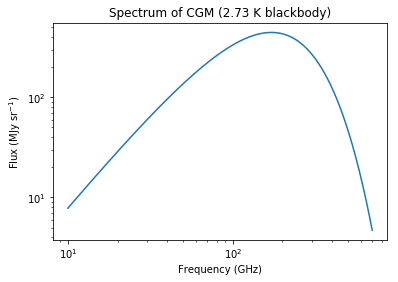

In [45]:
T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak
extent = 1e12

# Range of frequencies to plot
nu = np.linspace(1e10, 70 * 1e10, 1000)

plt.plot(nu / 1e9, planck(nu, T) / 1e-23 / 1e6)
plt.title(r'Spectrum of CGM (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.yscale('log')
plt.show()

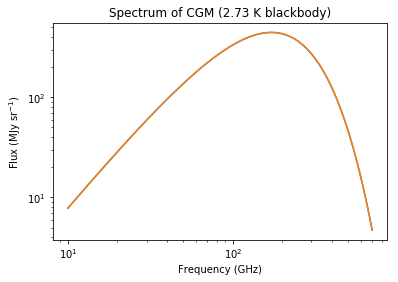

In [49]:
T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak
extent = 1e12

# Range of frequencies to plot
nu = np.linspace(1e10, 70 * 1e10, 1000)

nu1 = nu * 1.0004

plt.plot(nu / 1e9, planck(nu, T) / 1e-23 / 1e6)
plt.plot(nu1 / 1e9, planck(nu, T) / 1e-23 / 1e6)
plt.title(r'Spectrum of CGM (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.yscale('log')
plt.show()

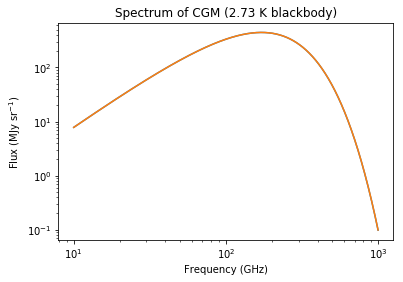

In [50]:
T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak
extent = 1e12

# Range of frequencies to plot
nu = np.linspace(1e10, 100 * 1e10, 1000)

plt.plot(nu / 1e9, planck(nu, T) / 1e-23 / 1e6)
plt.plot(nu / 1e9, planck(nu / 1.0004, T) / 1e-23 / 1e6)
plt.title(r'Spectrum of CGM (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.yscale('log')
plt.show()

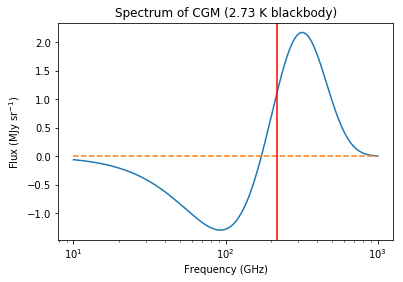

In [134]:
T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak
extent = 1e12

# Range of frequencies to plot
nu = np.linspace(1e10, 100 * 1e10, 1000)

ratio = 1.004
plt.plot(nu / 1e9, planck(nu / ratio, T) / 1e-23 / 1e6 - planck(nu, T) / 1e-23 / 1e6)
plt.plot(nu / 1e9, nu * 0, '--')
plt.axvline(x=218, color='r')
plt.title(r'Spectrum of CGM (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.show()

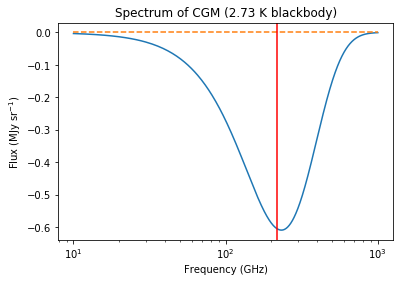

In [97]:
T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak
extent = 1e12

# Range of frequencies to plot
nu = np.linspace(1e10, 100 * 1e10, 1000)

ratio = 1.0004
plt.plot(nu / 1e9, (planck(nu, T / ratio) - planck(nu, T)) / (ratio ** 4 * 1e-23 * 1e6))
plt.plot(nu / 1e9, nu * 0, '--')
plt.axvline(x=218, color='r')
plt.title(r'Spectrum of CGM (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.show()

In [98]:
ratio**4

1.0016009602560254

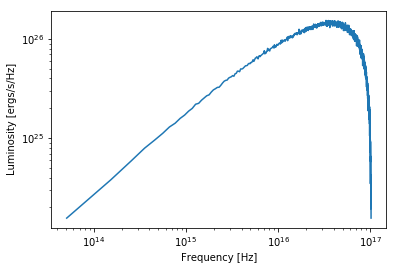

In [126]:
eV2Hz = eV / h
gamma = 10
beta = 1.
E_in = 1 * eV2Hz
tau = 0.01
L_s = 1e43
N_p = int(1e6)
L_p = L_s / N_p

cos1 = np.random.uniform(-1, 1, N_p)
cos2 = np.random.uniform(-1, 1, N_p)

E_outs = E_in * gamma**2 * (1 - beta * cos1) * (1 + beta * cos2)
hist, bins = np.histogram(E_outs, bins=1000)
fqs = 0.5 * (bins[1:] + bins[:-1])
dfq = fqs[1] - fqs[0]
L_out = hist * L_p * fqs / E_in * (1 - np.exp(-tau)) / dfq
plt.loglog(fqs, L_out)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Luminosity [ergs/s/Hz]')
plt.show()

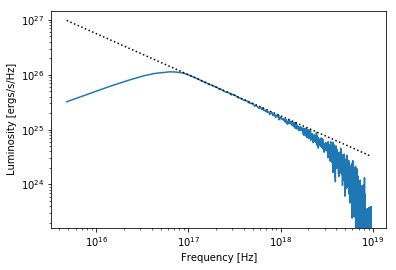

In [127]:
def sample_powerlaw(x_0, x_1, n, size):
    y = np.random.uniform(0, 1, size=size)
    return ((x_1**(n+1) - x_0**(n+1)) * y + x_0**(n+1))**(1./(n+1))

gamma_min, gamma_max = 10, 100
p = 2.5
gammas = sample_powerlaw(gamma_min, gamma_max, -p, size=N_p)
E_outs = E_in * gammas**2 * (1 - beta * cos1) * (1 + beta * cos2)
hist, bins = np.histogram(E_outs, bins=1000)
fqs = 0.5 * (bins[1:] + bins[:-1])
dfq = fqs[1] - fqs[0]
L_out = hist * L_p * fqs / E_in * (1 - np.exp(-tau)) / dfq
plt.loglog(fqs, L_out)
plt.loglog(fqs, 1e26*(fqs/1e17)**(-(p-1)/2.), 'k:')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Luminosity [ergs/s/Hz]')
plt.show()

In [119]:
T_in = 0.290 / E_in
T_in

1.2083333333333332e-15

In [120]:
E_in

240000000000000.0

In [121]:
0.290/2.73

0.10622710622710622

In [122]:
h*c/(0.106)/(1.6e-12)

0.0011114124953737474